In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, homogeneity_score, accuracy_score
import matplotlib.cm as cm

# Load the dataset
wine_dataset = load_wine()

# Access the feature names
feature_names = wine_dataset.feature_names

# Access the data and target
data = wine_dataset.data
target = wine_dataset.target

# Convert data and target to a Pandas DataFrame
wine_df = pd.DataFrame(data, columns=feature_names)
wine_df['target'] = target

np.random.seed(42)

print(wine_df.info())
print(wine_df.shape)

# Normalize features for better performance
min_max_scaler = MinMaxScaler()
wineX = min_max_scaler.fit_transform(wine_df.drop("target", axis=1).values)
wineY = wine_df["target"].values

# Perform a stratified split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(wineX, wineY, test_size=0.2, stratify=wineY, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


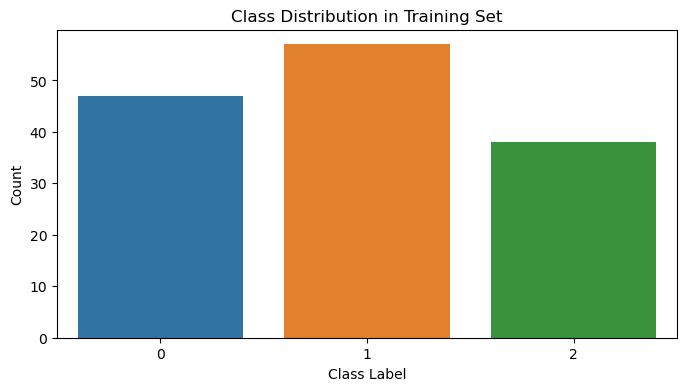

In [3]:
# Visualize class distribution in the training set
plt.figure(figsize=(8, 4))
sns.countplot(x=y_train)
plt.title("Class Distribution in Training Set")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.show()

/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


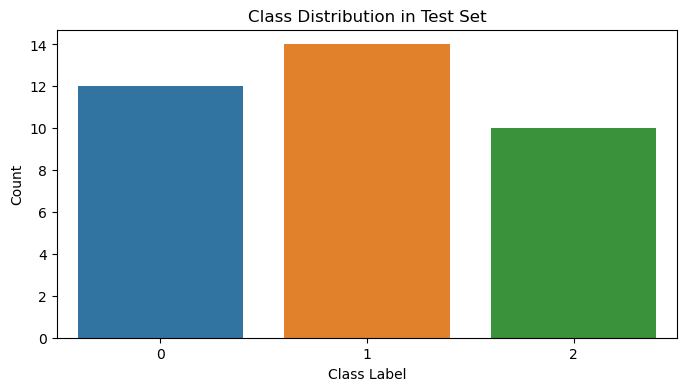

In [4]:
# Visualize class distribution in the test set
plt.figure(figsize=(8, 4))
sns.countplot(x=y_test)
plt.title("Class Distribution in Test Set")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.show()

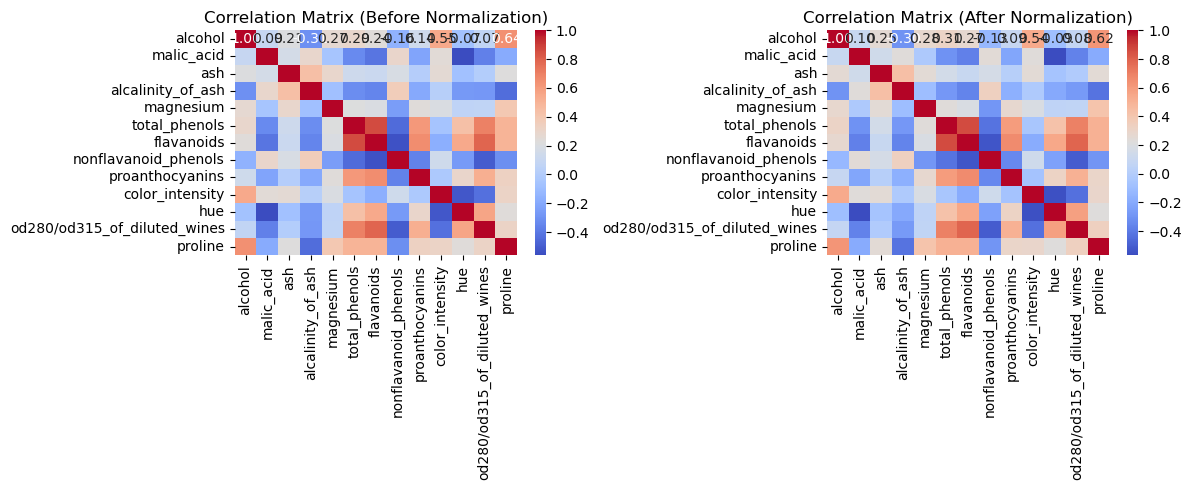

In [5]:
# Compute the correlation matrix before normalization
correlation_matrix_before = wine_df[feature_names].corr()

# Compute the correlation matrix after normalization
correlation_matrix_after = pd.DataFrame(X_train, columns=feature_names).corr()

# Plot the correlation matrices as heatmaps
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(correlation_matrix_before, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Before Normalization)")

plt.subplot(1, 2, 2)
sns.heatmap(correlation_matrix_after, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (After Normalization)")

plt.tight_layout()
plt.show()

In [19]:
# Convert the preprocessed NumPy array back to a Pandas DataFrame
preprocessed_df = pd.DataFrame(X_train, columns=feature_names)

# Add the target column back to the DataFrame
preprocessed_df['target'] = y_train

# Display the columns and the first few rows of the preprocessed DataFrame
print("Columns of the Preprocessed DataFrame:")
print(preprocessed_df.columns)

print("\nFirst few rows of the Preprocessed DataFrame:")
print(preprocessed_df.head())


Columns of the Preprocessed DataFrame:
Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

First few rows of the Preprocessed DataFrame:
    alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  0.592105    0.177866  0.791444           0.252577   0.434783   
1  0.710526    0.150198  0.716578           0.613402   0.336957   
2  0.621053    0.203557  0.673797           0.283505   0.250000   
3  0.715789    0.195652  0.561497           0.278351   0.206522   
4  0.602632    0.494071  0.545455           0.561856   0.239130   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.558621    0.493671              0.396226         0.299685   
1       0.696552    0.613924              0.301887         0.621451   
2       0.644828    0.548523

In [6]:
# Use X_train for clustering
clusters = list(range(2,31,1))
silh_wine_EM = {}
homog_wine_EM = {}

For n_clusters=2, The Silhouette Coefficient is 0.29488210720512603
For n_clusters=2, The homogeneity_score is 0.4030862800010001
For n_clusters=2, The average log_likelihood score is 8.5037613564445
For n_clusters=3, The Silhouette Coefficient is 0.2995021117146939
For n_clusters=3, The homogeneity_score is 0.8260444434877425
For n_clusters=3, The average log_likelihood score is 9.57624391551041
For n_clusters=4, The Silhouette Coefficient is 0.27692751453279507
For n_clusters=4, The homogeneity_score is 0.7939243505459579
For n_clusters=4, The average log_likelihood score is 11.295641379958333
For n_clusters=5, The Silhouette Coefficient is 0.25358604020526704
For n_clusters=5, The homogeneity_score is 0.8329783790124192
For n_clusters=5, The average log_likelihood score is 12.427290272959238
For n_clusters=6, The Silhouette Coefficient is 0.21946824819731092
For n_clusters=6, The homogeneity_score is 0.8480470583742137
For n_clusters=6, The average log_likelihood score is 13.9167444

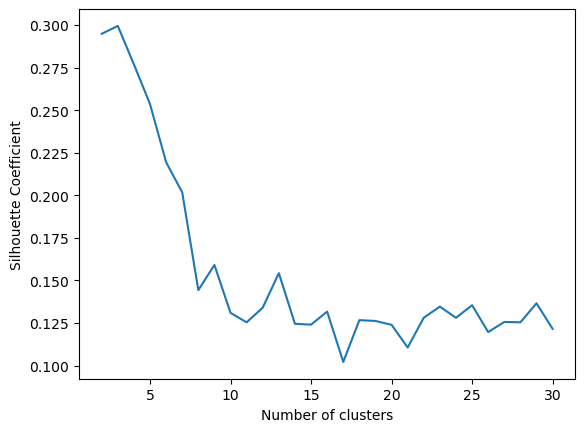

In [8]:
for cluster in clusters:
    gmm = GaussianMixture(n_components=cluster, max_iter=100, random_state=42, n_init=5).fit(X_train)
    label = gmm.predict(X_train)
    
    sil_coeff = silhouette_score(X_train, label, metric='euclidean')
    homog_score = homogeneity_score(y_train, label)
    log_likelihood = gmm.score(X_train)  # Compute average log likelihood
    
    silh_wine_EM[cluster] = sil_coeff
    homog_wine_EM[cluster] = homog_score
    
    print(f"For n_clusters={cluster}, The Silhouette Coefficient is {sil_coeff}")
    print(f"For n_clusters={cluster}, The homogeneity_score is {homog_score}")
    print(f"For n_clusters={cluster}, The average log_likelihood score is {log_likelihood}")

# Plot Silhouette Coefficients
plt.figure()
plt.plot(list(silh_wine_EM.keys()), list(silh_wine_EM.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

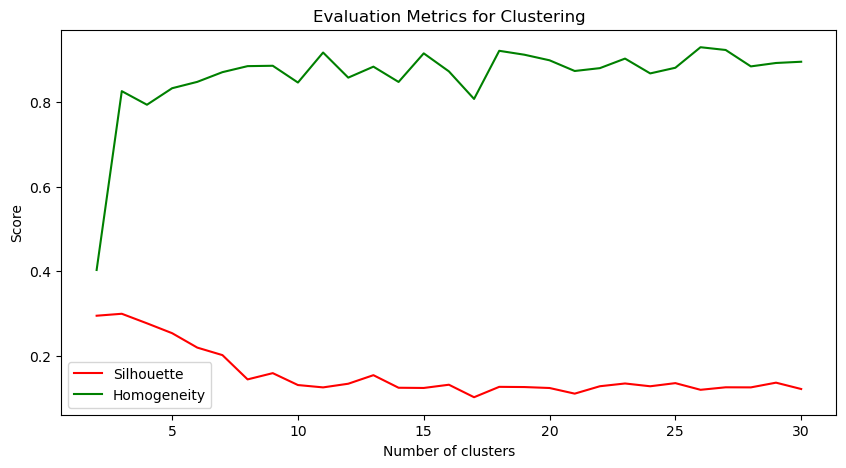

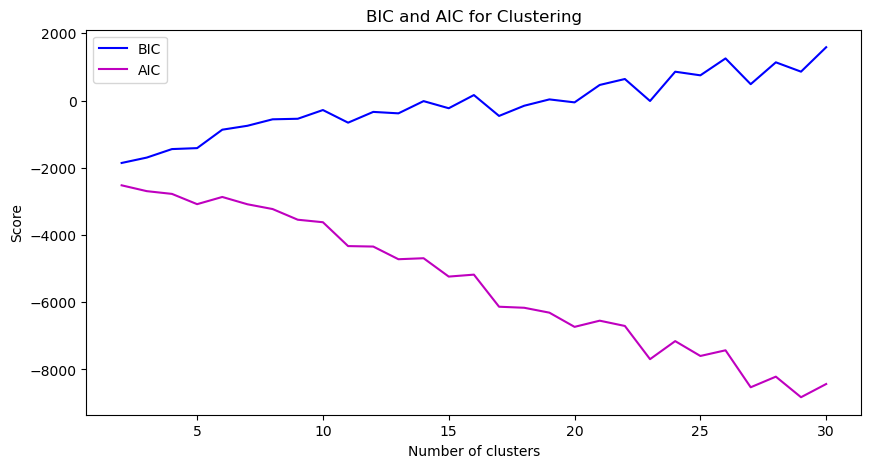

In [9]:
# Plot Silhouette Coefficient
plt.figure(figsize=(10, 5))
plt.plot(list(silh_wine_EM.keys()), list(silh_wine_EM.values()), 'r', label="Silhouette")

# Plot Homogeneity Score
plt.plot(list(homog_wine_EM.keys()), list(homog_wine_EM.values()), 'g', label="Homogeneity")

plt.legend()
plt.xlabel("Number of clusters")
plt.ylabel("Score")
plt.title("Evaluation Metrics for Clustering")

# Calculate BIC and AIC for each number of clusters
bic_scores = []
aic_scores = []

for cluster in clusters:
    gmm = GaussianMixture(n_components=cluster, max_iter=100, random_state=42, n_init=5).fit(wineX)
    bic_scores.append(gmm.bic(wineX))
    aic_scores.append(gmm.aic(wineX))

# Plot BIC and AIC
plt.figure(figsize=(10, 5))
plt.plot(clusters, bic_scores, 'b', label="BIC")
plt.plot(clusters, aic_scores, 'm', label="AIC")
plt.legend()
plt.xlabel("Number of clusters")
plt.ylabel("Score")
plt.title("BIC and AIC for Clustering")

plt.show()

In [10]:
# Fit a Gaussian Mixture Model with 3 components
gmm = GaussianMixture(n_components=3, max_iter=100, random_state=42, n_init=5).fit(wineX)

# Predict cluster labels
labels = gmm.predict(wineX)

# Modify cluster labels to align with true class labels
# In this case, you're converting cluster label 0 to class label 1 and vice versa
labels[labels == 0] = 3
labels[labels == 1] = 0
labels[labels == 3] = 1

# Calculate accuracy by comparing predicted labels to true labels
accuracy = accuracy_score((labels + 1), wineY)

print("Accuracy of clustering:", accuracy)

Accuracy of clustering: 0.016853932584269662


In [14]:
# Fit a Gaussian Mixture Model with 5 components
gmm = GaussianMixture(n_components=5, max_iter=100, random_state=42, n_init=5).fit(wineX)

# Predict cluster labels
labels = gmm.predict(wineX)

# Modify cluster labels to align with true class labels if needed
# (you can adjust this part based on your requirements)

# Calculate accuracy by comparing predicted labels to true labels
accuracy = accuracy_score(labels, wineY)  # No need for label modifications in this case

print("Accuracy of clustering with 5 clusters:", accuracy)

# Print the means of the GMM components
print("\nMeans of the GMM components:")
print(gmm.means_)

Accuracy of clustering with 5 clusters: 0.4044943820224719

Means of the GMM components:
[[0.71575937 0.25004195 0.57052351 0.32016914 0.38121485 0.63901299
  0.55910793 0.28487743 0.47256178 0.36530466 0.47098189 0.69354891
  0.59998496]
 [0.44065517 0.41381519 0.56210137 0.55277905 0.27765314 0.27043595
  0.18644412 0.73534451 0.22779392 0.22803431 0.35781182 0.33669429
  0.18170786]
 [0.30222436 0.21581844 0.43532172 0.45997992 0.2362239  0.46743947
  0.37324205 0.36298937 0.40124056 0.14447154 0.47951978 0.58604733
  0.16475418]
 [0.50625    0.26852767 0.73596257 0.68427835 0.57201087 0.65948276
  0.55485232 0.46226415 0.50236593 0.22354949 0.56199187 0.69047619
  0.34201141]
 [0.55950567 0.48522962 0.56530547 0.55169167 0.32809203 0.23939593
  0.10543714 0.55362744 0.25710885 0.57367539 0.13008104 0.13031992
  0.25951922]]


In [12]:
# Fit a Gaussian Mixture Model with 10 components
gmm = GaussianMixture(n_components=10, max_iter=100, random_state=42, n_init=5).fit(wineX)

# Predict cluster labels
labels = gmm.predict(wineX)

# Modify cluster labels to align with true class labels if needed
# (you can adjust this part based on your requirements)

# Calculate accuracy by comparing predicted labels to true labels
accuracy = accuracy_score(labels, wineY)  # No need for label modifications in this case

print("Accuracy of clustering with 10 clusters:", accuracy)

Accuracy of clustering with 10 clusters: 0.02247191011235955


In [16]:
#K-Means SSE 
from sklearn.cluster import KMeans

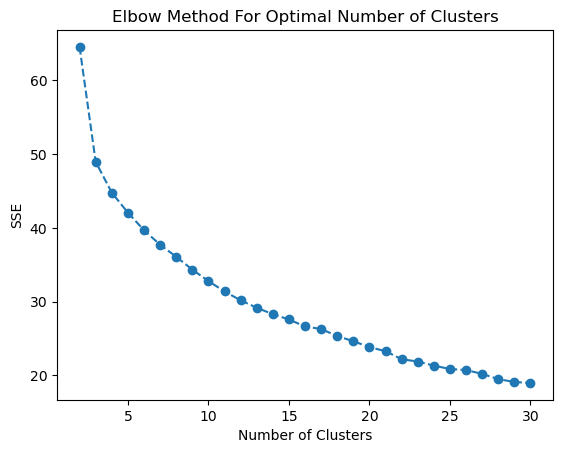

In [31]:
# SSE Calculation for the wine dataset
clusters = list(range(2,31,1))
sse_wine = {}

for cluster in clusters:
    kmeans = KMeans(n_clusters=cluster, n_init=50, max_iter=1000, random_state=42).fit(wineX)
    sse_wine[cluster] = kmeans.inertia_

# Plotting the SSE
plt.figure()
plt.plot(list(sse_wine.keys()), list(sse_wine.values()), marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [22]:
from sklearn.metrics import adjusted_mutual_info_score
kmeans_3clusters = KMeans(n_clusters=3, n_init=50, max_iter=1000, random_state=42).fit(wineX)
print("Accuracy for 3 clusters:", accuracy_score((kmeans_3clusters.labels_+1), wineY))
print("Adjusted Mutual Information Score for 3 clusters:", adjusted_mutual_info_score((kmeans_3clusters.labels_+1), wineY))

Accuracy for 3 clusters: 0.6235955056179775
Adjusted Mutual Information Score for 3 clusters: 0.8513739712458895


In [23]:
from sklearn.metrics import adjusted_mutual_info_score
kmeans_5clusters = KMeans(n_clusters=5, n_init=50, max_iter=1000, random_state=42).fit(wineX)
print("Accuracy for 5 clusters:", accuracy_score((kmeans_5clusters.labels_+1), wineY))
print("Adjusted Mutual Information Score for 5 clusters:", adjusted_mutual_info_score((kmeans_5clusters.labels_+1), wineY))

Accuracy for 5 clusters: 0.07865168539325842
Adjusted Mutual Information Score for 5 clusters: 0.750520064005811


For n_clusters=2, The Silhouette Coefficient is 0.2987221815974774
For n_clusters=2, The homogeneity_score is 0.38975015386142103
For n_clusters=3, The Silhouette Coefficient is 0.3013463273503232
For n_clusters=3, The homogeneity_score is 0.8570247637781875
For n_clusters=4, The Silhouette Coefficient is 0.25993667561623146
For n_clusters=4, The homogeneity_score is 0.8963777789507691
For n_clusters=5, The Silhouette Coefficient is 0.24650935728790724
For n_clusters=5, The homogeneity_score is 0.9072398234174349
For n_clusters=6, The Silhouette Coefficient is 0.21831834355990662
For n_clusters=6, The homogeneity_score is 0.8017314191152549
For n_clusters=7, The Silhouette Coefficient is 0.20831466920808459
For n_clusters=7, The homogeneity_score is 0.8837024190501439
For n_clusters=8, The Silhouette Coefficient is 0.14009889489660063
For n_clusters=8, The homogeneity_score is 0.8708454767301786
For n_clusters=9, The Silhouette Coefficient is 0.1350090533910569
For n_clusters=9, The ho

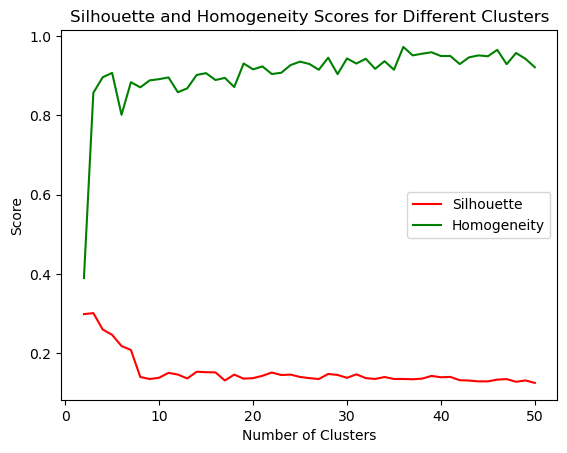

In [29]:
# Silhouette and Homogeneity Calculation
silh_wine = {}
homog_wine = {}
clusters = list(range(2,51,1))

for cluster in clusters:
    kmeans = KMeans(n_clusters=cluster, n_init=50, max_iter=1000, random_state=42).fit(wineX)
    label = kmeans.labels_
    sil_coeff = silhouette_score(wineX, label, metric='euclidean')
    homog_score = homogeneity_score(wineY, (label+1))
    
    silh_wine[cluster] = sil_coeff
    homog_wine[cluster] = homog_score
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(cluster, sil_coeff))
    print("For n_clusters={}, The homogeneity_score is {}".format(cluster, homog_score))

# Plotting Silhouette and Homogeneity scores
plt.figure()
plt.plot(list(silh_wine.keys()), list(silh_wine.values()), 'r', label="Silhouette")
plt.plot(list(homog_wine.keys()), list(homog_wine.values()), 'g', label="Homogeneity")
plt.title('Silhouette and Homogeneity Scores for Different Clusters')
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.legend()
plt.show()

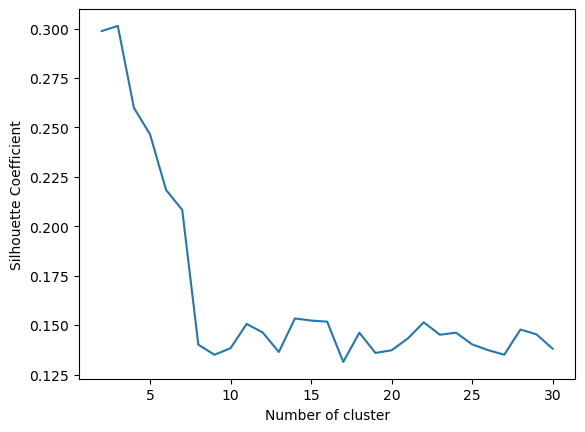

In [28]:
plt.figure()
plt.plot(list(silh_wine.keys()), list(silh_wine.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")
plt.show()